<h2>Analisis Data <strong>bike-sharing-dataset

<ul>
<li>Nama = Aliffa Agnur
<li>Email = m211b4ky0393@bangkit.academy
<li>ID Dicoding = aliffa_agnur_h5Bg

<div> Dataset yang digunakan : <br>
<ul><li>day.csv<br><li>hour.csv

Pertanyaan Bisnis : <br>
<ol>
<li> Bagaimana korelasi antar variable tsb? dan variable yg paling mempengaruhi seseorang untuk meminjam sepeda? dan seberapa besar pengaruh seseorang meminjam sepeda?
<li> Bulan apa yang memiliki jumlah penyewaan tertinggi dan terendah? Bagaimana kita bisa meningkatkan penyewaan di bulan-bulan yang sepi?
<li> Bagaimana tren penyewaan sepeda berubah dari tahun ke tahun? Apakah bisnis mengalami pertumbuhan?
<li> Apakah ada perbedaan signifikan antara jumlah penyewa biasa (casual) dan penyewa terdaftar (registered)? Bagaimana kita bisa meningkatkan jumlah penyewa terdaftar?
<li> Apakah hari libur dan akhir pekan memiliki dampak signifikan terhadap jumlah penyewaan sepeda dibandingkan dengan hari kerja?
<li> Apakah musim mempengaruhi banyaknya penyewa sepeda? musim apa yg memberikan pengguna sepeda terbesar?


Mengimport Library Yang Diperlukan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd



In [2]:
#untuk membersihkan memory
import gc
gc.collect()

0

<h2> DATA UNDERSTANDING </h2>

<span style='color:lightblue;'> Langkah awal dalam Menganalisis data yaitu Memahami data nya terlebih dahulu. </span>

In [3]:
day = pd.read_csv(r"./data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day.shape

(731, 16)

In [5]:
day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [4]:
hour = pd.read_csv(r"C:\Submission\Data\hour.csv")  #membuat dataframe dari dataset hour.csv
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour.shape

(17379, 17)

In [8]:
hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


</div style='color:lightblue;'> Setelah saya mengidentifikasi dataset nya , saya mendapatkan beberapa informasi penting yg berguna. 

<span> <ul style='color:aqua;'>
    <li>kolom instant yaitu kolom sample</li>
    <li>dteday itu tanggal laporan perusahaan setiap harinya </li>
    <li>season itu berisi musim saat pelanggan meminjam sepeda . 1 menunjukkan musim dingin , dan 4 menunjukkan musim gugur</li>
    <li>yr merupakan tahun saat pelanggan meminjam sepeda dimulai dari perusahaan itu berdiri</li>
    <li>mnth itu bulan. total ada 12 bulan</li>
    <li>holiday itu menunjukkan apakah hari libur atau tidak</li>
    <li>weekday itu hari dalam seminggu (0-6) (minggu-sabtu)</li>
    <li>workingday menunjukkan apakah hari tsb adalah hari kerja atau tidak</li>
    <li>weathersit menunjukkan kondisi cuaca .</li>
    <li>temp yaitu suhu temperature pd hari itu yg telah di normalisasi </li>
    <li>atemp itu suhu yg dirasakan </li>
    <li>hum itu kelembapan dalam skala normalisasi </li>
    <li>windspeed itu kondisi angin dalam skala normalisasi</li>
    <li>casual itu jumlah penyewa sepeda yg tidak mempunyai kartu anggota</li>
    <li>registered itu jumlah penyewa sepeda yg mempunyai kartu anggota</li>
    <li>cnt yaitu jumlah penyewa sepeda dalam sehari / per sample</li>
</ul> </span> 
</div>

<h2 style='color:lightblue;'> DATA WRANGLING </h2>

<span style='color:lightblue;'> next melakukan data wrangling </span>

In [11]:
day['dteday'] = pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

<span> karena tipe data untuk 'dteday' object , maka saya ganti dgn tipe data datetime </span>

In [12]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

<span style='color:lightblue;'> Melakukan statistik Deskriptif untuk melihat nilai mean , simpangan baku, nilai minimum dan maximum dari kedua dataset </span>

In [13]:
day.drop(['instant','dteday'],axis=1).describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
hour.drop(['instant','dteday'],axis=1).describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
#MENAMPILKAN NILAI NULL UNTUK SETIAP KOLOM DIDALAM DATASET

print(day.isna().sum()) 
print(hour.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<span> karena tak ada nilai null , maka datasetnya sudah bersih dari nilai null </span>

In [16]:
print(f"banyaknya sample duplicate di dataset day.csv = {day.duplicated().sum()}")
print(f"banyaknya sample duplicate di dataset hour.csv = {hour.duplicated().sum()}")

banyaknya sample duplicate di dataset day.csv = 0
banyaknya sample duplicate di dataset hour.csv = 0


<span> Untuk kedua dataset tsb aman dari nilai duplicate </span>

<h2> EXPLORATORY DATA ANALYSIS (EDA)</h2>


<span> Langkah selanjutnya didalam analisis data , yaitu melakukan exploratory data analysis (EDA) </span>

<span style='color:lightblue;'> Pertama saya akan menampilkan histogram dari setiap kolom tsb , untuk melihat distribusi probabilitas nya </span>

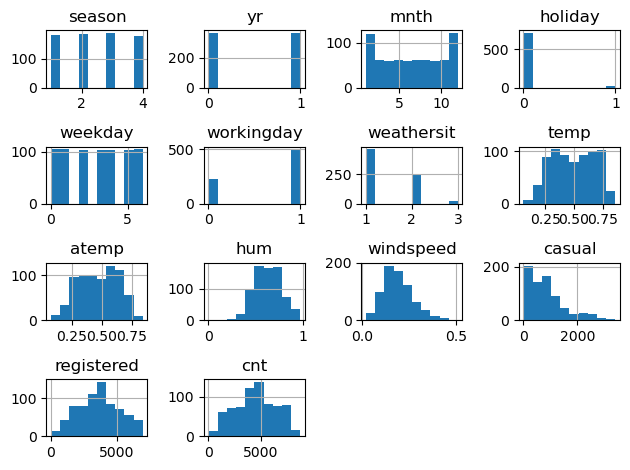

In [17]:

day.drop(columns=['instant','dteday']).hist() #tidak menampilkan kolom 'instant' dan 'dteday' , karena kedua kolom tsb mempunyai nilai unik setiap samplenya
plt.tight_layout()

<span> dari gambar histogram diatas , histogram untuk windspeed,cnt,registered,temp dan atemp... untuk bentuk histogramnya cenderung membentuk distribusi normal . dan sisanya membentuk skewness . 
lalu pada histogram 'holiday' , rata2 sample berada di angka 0 , itu artinya lebih dari 90% , sample holidaynya berada di angka 0. </span>

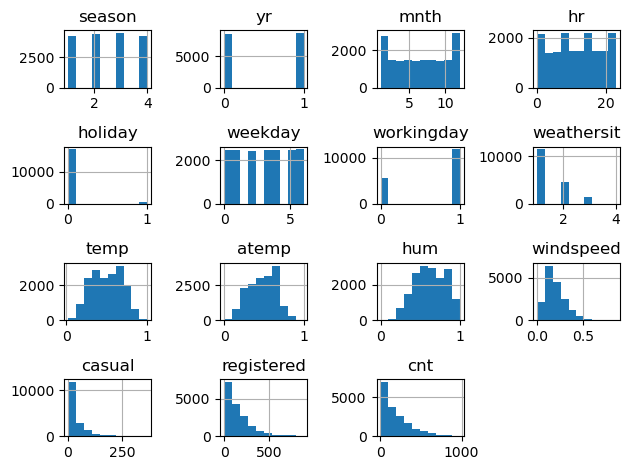

In [18]:
hour.drop(['instant','dteday'],axis=1).hist()
plt.tight_layout()

<span> untuk bentuk histogram dataset hour.csv , bentuk nya agak mirip dgn dataset day.csv </span>

<strong style='color:#274AD7; font-size:24px;'>Bagaimana korelasi antar variable tsb? dan variable yg paling mempengaruhi seseorang untuk meminjam sepeda? dan seberapa besar pengaruh seseorang meminjam sepeda?

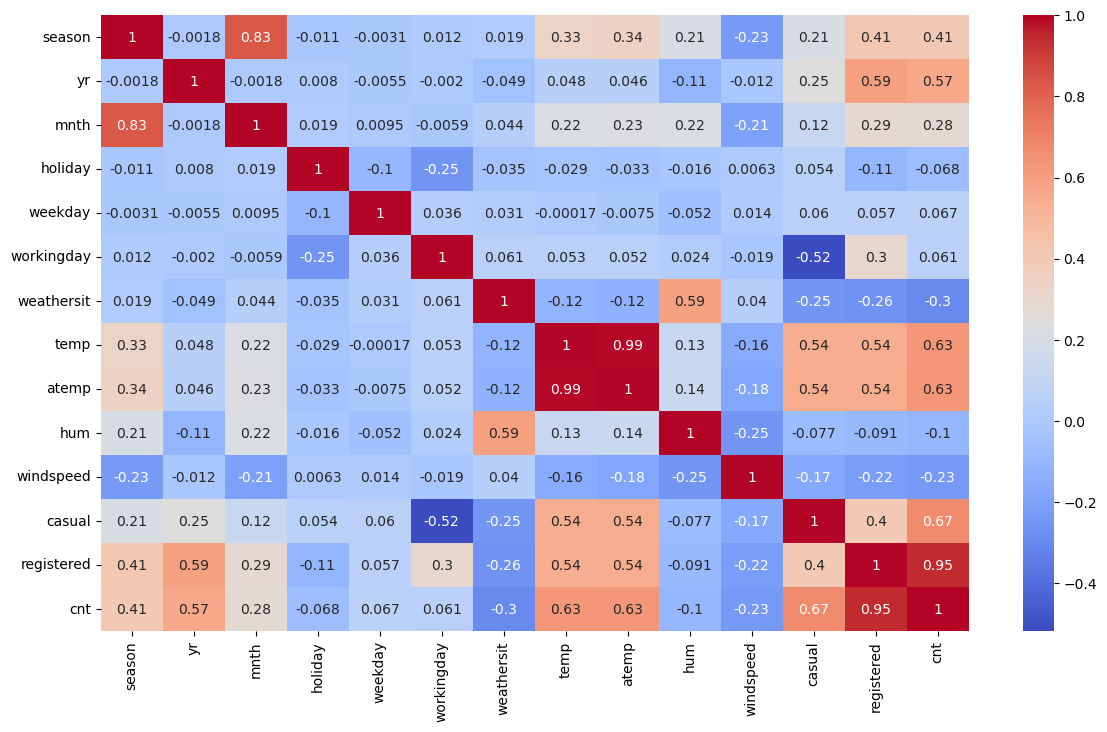

In [14]:

corr_day = day.drop(columns=['instant','dteday']).corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr_day,annot=True,cmap='coolwarm')
plt.savefig("./data/heatmap_day.png") #menyimpan gambar

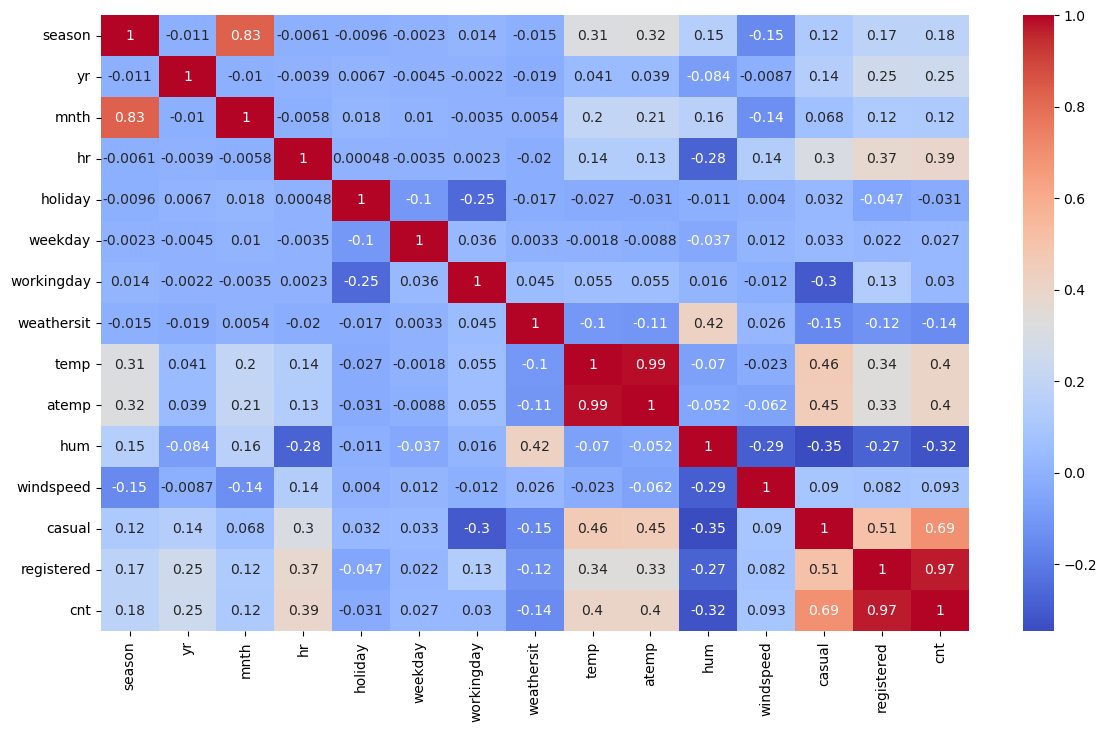

In [15]:
corr_hour  = hour.drop(['instant','dteday'],axis=1).corr(method='pearson')

plt.figure(figsize=(14,8))
sns.heatmap(data=corr_hour,annot=True,cmap='coolwarm')

plt.savefig('./data/heatmap_hour.png')

Text(0.5, 1.0, 'hubungan year dengan penyewaan sepeda')

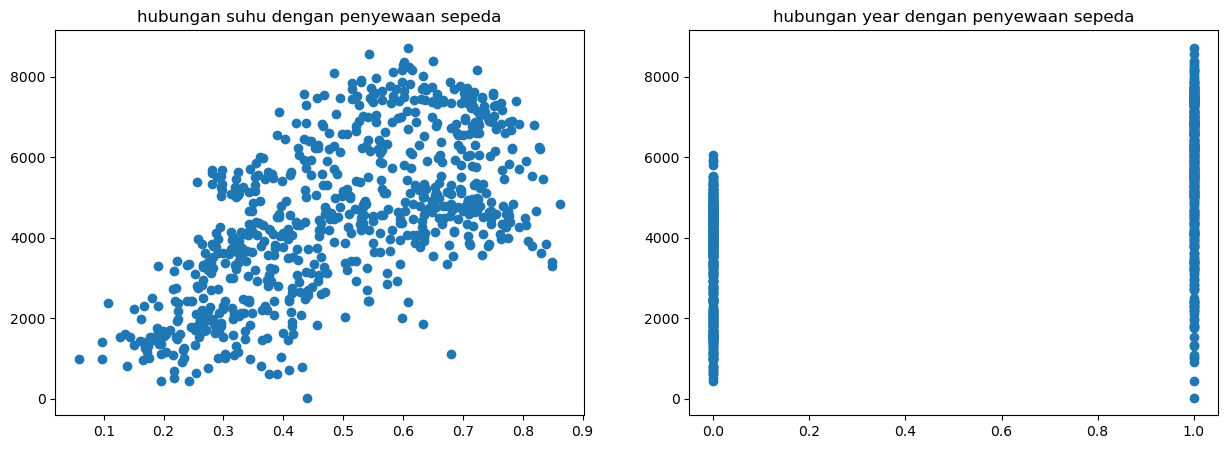

In [21]:
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(x='temp',y='cnt',data=day)
ax[0].set_title('hubungan suhu dengan penyewaan sepeda')

ax[1].scatter(x='yr',y='cnt',data=day)
ax[1].set_title('hubungan year dengan penyewaan sepeda')

Text(0.5, 0, 'jumlah penyewa sepeda')

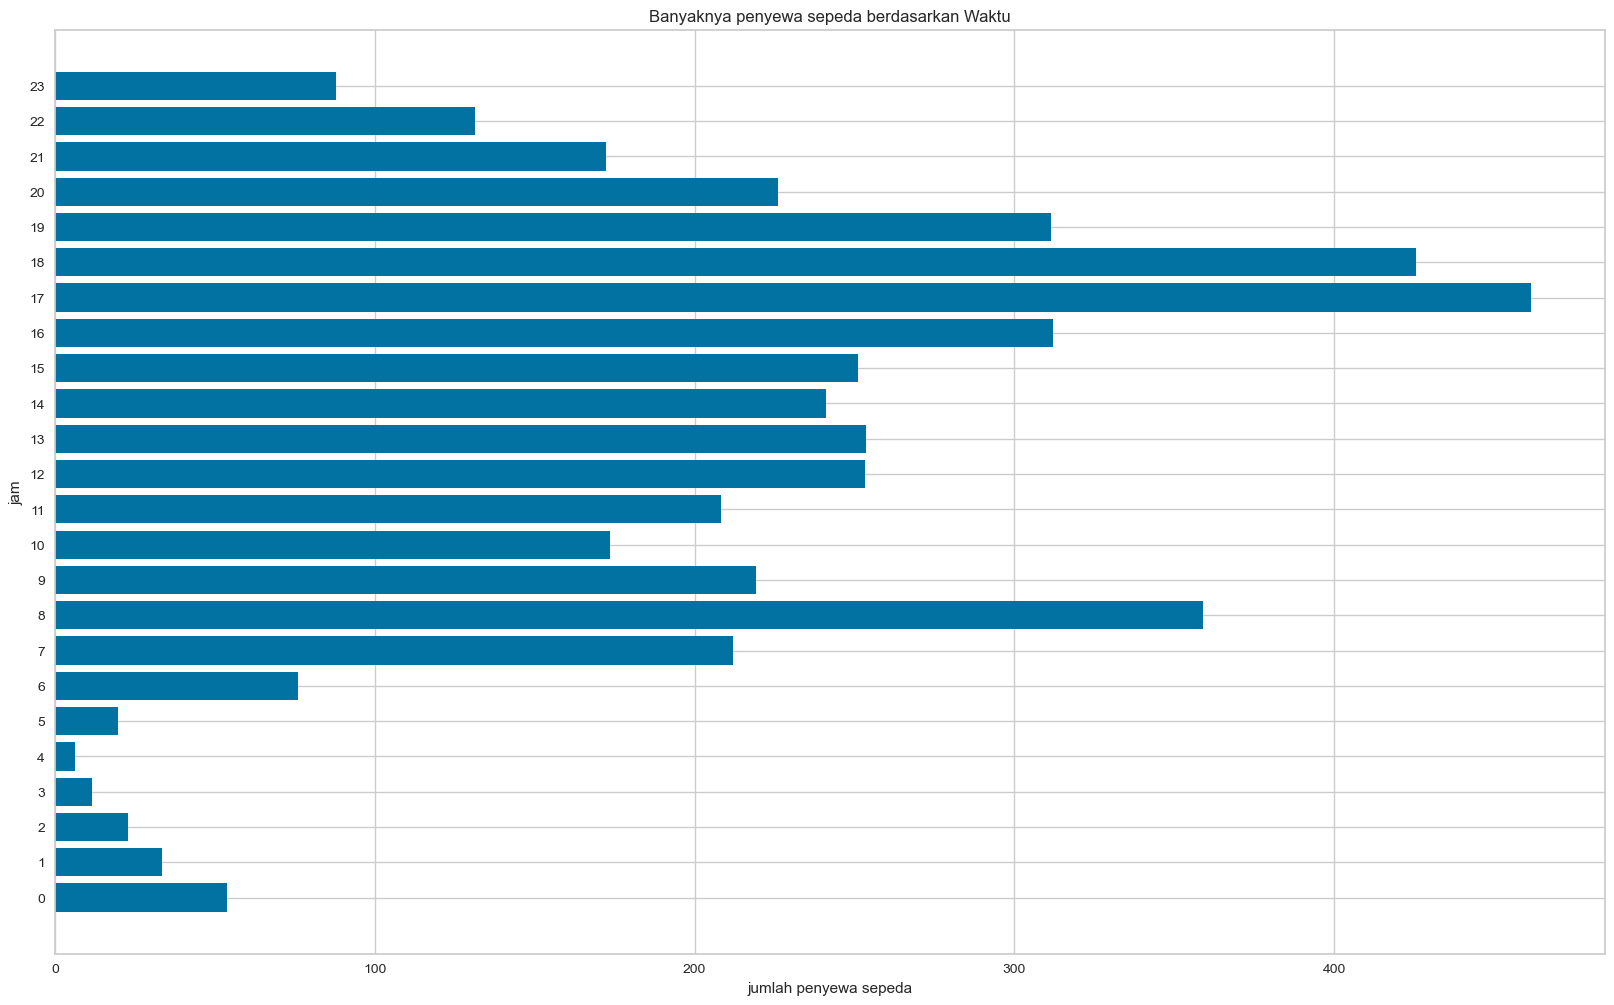

In [32]:
fig , ax = plt.subplots(nrows=1,ncols=1,figsize=(20,12))

penyewa_berdasarkan_waktu = hour.groupby('hr')['cnt'].mean().reset_index()



ax.barh(y='hr',width='cnt',data=penyewa_berdasarkan_waktu)
ax.set_title('Banyaknya penyewa sepeda berdasarkan Waktu')
ax.set_yticks(range(0,24))
ax.set_ylabel('jam')
ax.set_xlabel('jumlah penyewa sepeda')


<span style='color:#F7515C;'> melakukan modelling untuk mengidentifikasi , seberapa besar pengaruh faktor-faktor tsb terhadap jumlah peminjaman sepeda per harinya menggunakan model terbaik</span>

<span style='color:lightblue;'> Menggunakan pycaret untuk melakukan modelling </span>

In [23]:
from pycaret.regression import *

setup_dataset = day.drop(columns=['instant','dteday','registered','casual']) #menghapus dataset yg tidak berpengaruh 

setup_model = setup(data=setup_dataset,target='cnt',session_id=42,transformation='yeo-johnson') 

,Description,Value
0,Session id,42
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(731, 12)"
4,Transformed data shape,"(731, 12)"
5,Transformed train set shape,"(511, 12)"
6,Transformed test set shape,"(220, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


<span > MENGINISIALISASI ENVIRONMENT

In [24]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,501.5766,486179.9432,690.7781,0.8585,0.2277,0.1703,0.0630
gbr,Gradient Boosting Regressor,500.5207,484003.3246,687.7082,0.8582,0.2225,0.1637,0.0320
et,Extra Trees Regressor,489.3270,500305.2734,697.4886,0.8555,0.2386,0.1715,0.0500
rf,Random Forest Regressor,505.1892,529379.3932,717.5804,0.8489,0.2432,0.1834,0.0640
ada,AdaBoost Regressor,675.3370,760077.9034,867.9082,0.7810,0.2892,0.2393,0.0300
lr,Linear Regression,686.8190,870268.9454,917.6870,0.7486,0.2704,0.2166,0.6500
lasso,Lasso Regression,702.5890,903228.7815,936.2142,0.7399,0.2717,0.2233,0.3040
llar,Lasso Least Angle Regression,702.6462,903337.1455,936.2725,0.7398,0.2717,0.2233,0.0150
br,Bayesian Ridge,704.9728,904241.0352,937.3190,0.7395,0.2718,0.2238,0.0210
huber,Huber Regressor,699.7081,916427.8993,943.6848,0.7353,0.2741,0.2237,0.0180


<span style='color:lightblue;'> MENCARI MODEL TERBAIK. MODEL TERBAIK DISINI ADALAH MODEL LIGHTGBM dgn nilai R2 0.85 </span>

<span >Lalu membuat model Lightgbm </span>

In [25]:
model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,423.0325,386369.7260,621.5865,0.8835,0.1353,0.0985
1,623.9381,715583.5575,845.9217,0.7848,0.3296,0.2658
2,441.8330,347401.7998,589.4080,0.8860,0.1889,0.1302
3,490.9914,543393.3773,737.1522,0.8753,0.3602,0.2831
4,514.6262,572572.4696,756.6852,0.8575,0.2917,0.2074
5,434.0903,358096.1325,598.4113,0.8962,0.1287,0.0968
6,592.0533,679072.6802,824.0587,0.7397,0.2452,0.1765
7,542.3974,523981.1814,723.8654,0.8671,0.1575,0.1255
8,438.1099,325366.3382,570.4089,0.9061,0.2199,0.1620


In [26]:
evaluation_metrics = pull()

r2 = evaluation_metrics.loc['Mean','R2']
print(f"nilai r2 nya {r2}")

nilai r2 nya 0.8585


<strong style='color:#274AD7; font-size:24px;'> Bulan apa yang memiliki jumlah penyewaan tertinggi dan terendah? Bagaimana kita bisa meningkatkan penyewaan di bulan-bulan yang sepi?

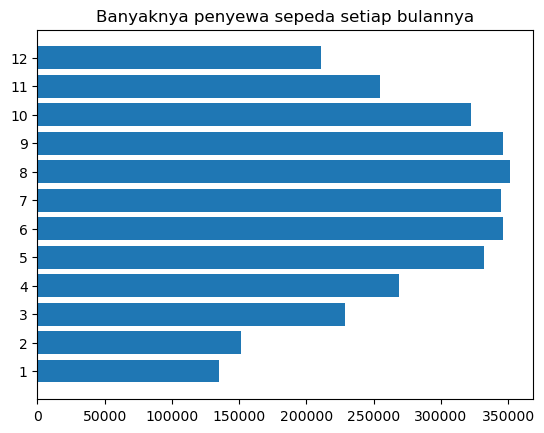

Bulan dengan penyewa sepeda terendah adalah bulan 1
Bulan dengan penyewa sepeda tertinggi adalah bulan 8


,mnth,cnt
7,8,351194
5,6,346342
8,9,345991
6,7,344948
4,5,331686
9,10,322352
3,4,269094
10,11,254831
2,3,228920
11,12,211036


In [31]:
jumlah_penyewa_perbulan = (day.groupby('mnth')['cnt'].sum()).reset_index().nlargest(n=12,columns='cnt')


plt.barh(y=jumlah_penyewa_perbulan['mnth'],width=jumlah_penyewa_perbulan['cnt'],data=jumlah_penyewa_perbulan)
plt.yticks(range(1,13))
plt.title('Banyaknya penyewa sepeda setiap bulannya')
plt.show()
penyewa_bulan_terendah = jumlah_penyewa_perbulan.sort_values(by='cnt',ascending=True).head(1)
print("Bulan dengan penyewa sepeda terendah adalah bulan {}".format(penyewa_bulan_terendah.iloc[0,0]))
print("Bulan dengan penyewa sepeda tertinggi adalah bulan {}".format(jumlah_penyewa_perbulan.iloc[0,0]))
jumlah_penyewa_perbulan

<strong style='color:#274AD7; font-size:24px;'> Bagaimana tren penyewaan sepeda berubah dari tahun ke tahun? Apakah bisnis mengalami pertumbuhan?

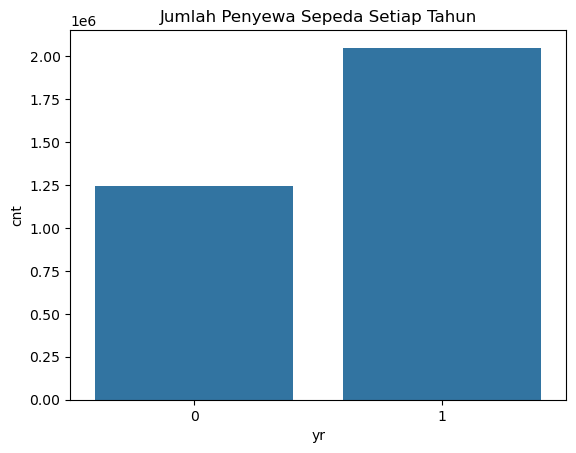

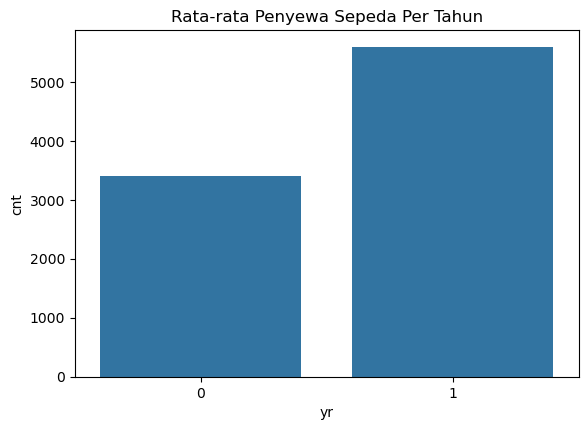

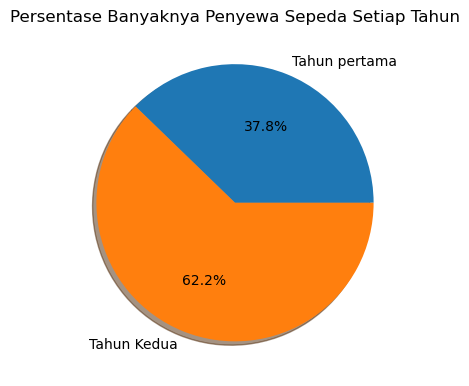

In [110]:
jumlah_penyewa_per_tahun = day.groupby(by='yr')['cnt'].sum().reset_index()


rata2_penyewa_per_tahun = ((day.groupby(by='yr')['cnt'].mean()).round(2)).reset_index()
rata2_penyewa_per_tahun

sns.barplot(data=jumlah_penyewa_per_tahun,x='yr',y=jumlah_penyewa_per_tahun['cnt'])
plt.title('Jumlah Penyewa Sepeda Setiap Tahun')
plt.figure(figsize=(6.5,4.5))
sns.barplot(data=rata2_penyewa_per_tahun,x='yr',y='cnt')
plt.title('Rata-rata Penyewa Sepeda Per Tahun')
plt.show()

plt.figure(figsize=(6.5,4.5))
plt.pie(x=jumlah_penyewa_per_tahun['cnt'],labels=['Tahun pertama','Tahun Kedua'],autopct='%1.1f%%',shadow=True)
plt.title('Persentase Banyaknya Penyewa Sepeda Setiap Tahun')
plt.savefig('piechart_banyaknya_penyewa_sepeda_pertahun.png')
plt.show()

pada bar chart pertama , nilai cnt merepresentasikan banyaknya penyewa sepeda dalam waktu 1 tahun (nilai dalam bentuk jutaan)

<span style='color:#274AD7; font-size:24px;'> <strong>Apakah ada perbedaan signifikan antara jumlah penyewa biasa (casual) dan penyewa terdaftar (registered)? Bagaimana kita bisa meningkatkan jumlah penyewa terdaftar? </strong></span>

<span style='color:lightblue;'> Melakukan uji hipotesis untuk mengidentifikasi perbedaan antara jumlah penyewa sepeda biasa dengan penyewa sepeda terdaftar dalam 1 hari </span>

<span > Pada program dibawah , saya menggunakan uji t independent untuk mengetahui apakah ada perbedaan jumlah penyewa biasa dengan jumlah penyewa terdaftar dalam 1 hari </span>

<span style='color:#42C2F9;'> H0 = jumlah penyewa biasa == jumlah penyewa terdaftar <br> H1 = jumlah penyewa biasa != jumlah penyewa terdaftar <br> 
Hipotesis H0 ditolak apabila nilai p_value < 0.05</span>

In [29]:
from scipy import stats

#melakukan ttest independent
t_coef , p_value = stats.ttest_ind(day['casual'],day['registered'])

if p_value < 0.05:
    print(f"Hipotesis ditolak! terdapat perbedaan yg signifikan antara jumlah penyewa sepeda biasa dgn jumlah penyewa sepeda terdaftar dalam 1 harinya")
else:
    print('Tidak ada perbedaan yg signifikan antara jumlah penyewa sepeda biasa dgn jumlah penyewa sepeda terdaftar dalam 1 harinya')

Hipotesis ditolak! terdapat perbedaan yg signifikan antara jumlah penyewa sepeda biasa dgn jumlah penyewa sepeda terdaftar dalam 1 harinya


<strong style='color:#274AD7; font-size:24px;'> Apakah hari libur dan akhir pekan memiliki dampak signifikan terhadap jumlah penyewaan sepeda dibandingkan dengan hari kerja?

Terdapat perbedaan signifikan antara jumlah penyewa di hari libur/pekan dengan jumlah penyewa di hari kerja


(1000.0, 4814.061)

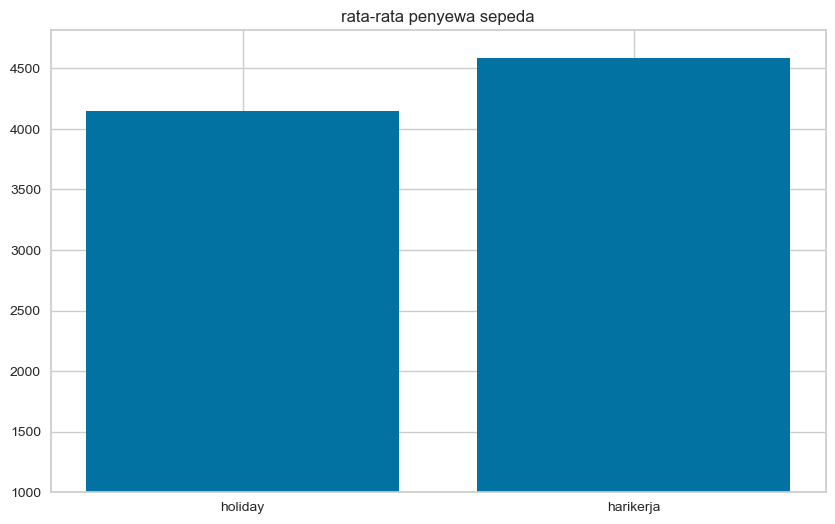

In [30]:
holiday = day[(day['holiday'] == 1) | (day['weekday'] == 0)]
holiday

harikerja = day[day['workingday'] == 1]
holiday

f_statistic , p_value = stats.f_oneway(holiday['cnt'],harikerja['cnt'])
if p_value < 0.05:
    print('Terdapat perbedaan signifikan antara jumlah penyewa di hari libur/pekan dengan jumlah penyewa di hari kerja')
else:
    print('tak ada perbedaan yg signifikan antara jumlah penyewa di hari libur/pekan dengan jumlah penyewa di hari kerja')


#menampilkan bar chart
holiday_mean = holiday['cnt'].mean()
harikerja_mean = harikerja['cnt'].mean()

dict = {
    'Jenis':['holiday','harikerja'],
    'rata-rata':[holiday_mean,harikerja_mean]
}
new_df = pd.DataFrame(dict)

plt.figure(figsize=(10,6))
plt.bar(x=new_df['Jenis'],height='rata-rata',data=new_df)
plt.title('rata-rata penyewa sepeda')
plt.ylim(1000)

<strong style='color:#274AD7; font-size:24px;'>  Apakah musim mempengaruhi banyaknya penyewa sepeda? musim apa yg memberikan pengguna sepeda terbesar?

In [55]:
#Uji statistik
#menggunakan korelasi pearson untuk mencari tahu hubungan antara musim dgn banyaknya penyewa sepeda

corr_pearson , p_value = stats.pearsonr(day['season'],day['cnt'])
if p_value < 0.05:
    print("korelasi antara ke 2 variable cukup kuat")
else: 
    print("Tak ada korelasi antar ke 2 nya")

#selanjutnya kita menggunakan uji anova untuk mengetahui perbedaan penyewa antara ke 4 musim
season_1 = day[day['season'] == 1]['cnt']
season_2 = day[day['season'] == 2]['cnt']
season_3 = day[day['season'] == 3]['cnt']
season_4 = day[day['season'] == 4]['cnt']

f_statistic , p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
if p_value < 0.05:
    print("Hipotesis H0 ditolak! terdapat perbedaan penyewa sepeda antara ke 4 musim")
else:
    print("Tak ada perbedaan penyewa sepeda antara ke 4 musim")

#SELANJUTNYA MELAKUKAN UJI POST-HOCC UNTUK MENGETAHUI MUSIM MANA YG BERBEDA DARI YG LAIN.
turkey_result = pairwise_tukeyhsd(endog=day['cnt'],groups=day['season'],alpha=0.05)
turkey_result.summary()


korelasi antara ke 2 variable cukup kuat
Hipotesis H0 ditolak! terdapat perbedaan penyewa sepeda antara ke 4 musim


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2388.1989,0.0,1965.3325,2811.0653,True
1,3,3040.1706,0.0,2619.5409,3460.8003,True
1,4,2124.0303,0.0,1697.6444,2550.4163,True
2,3,651.9717,0.0004,233.0927,1070.8507,True
2,4,-264.1686,0.3782,-688.8276,160.4904,False
3,4,-916.1403,0.0,-1338.572,-493.7085,True


dari uji post-hocc diatas , antara season 1 hingga 4 , hanya season 2 dengan season 4 saja yang tidak ada perbedaan banyaknya penyewa sepeda

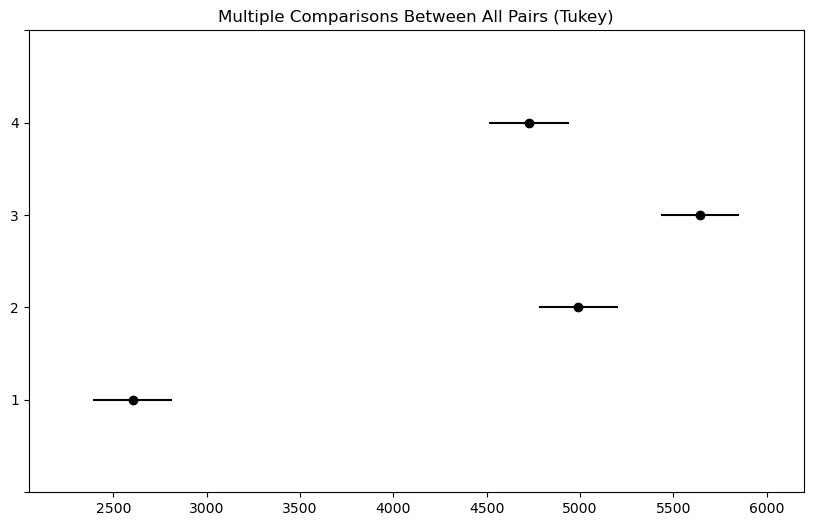

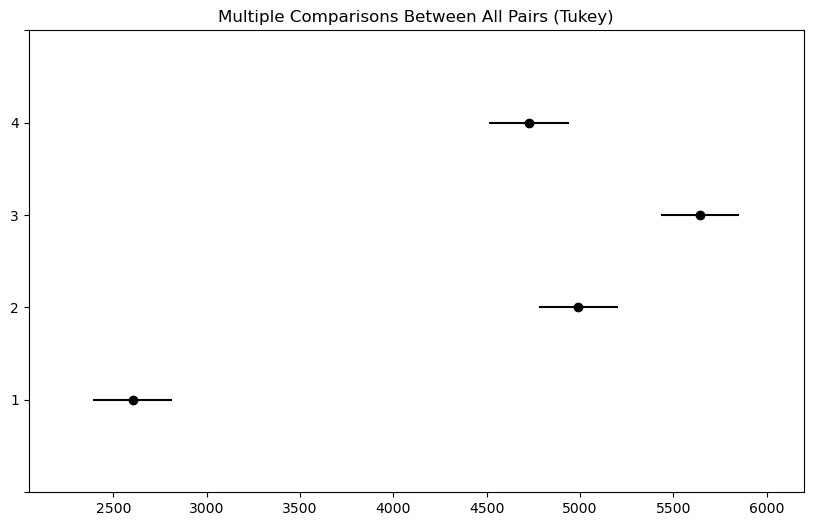

In [56]:
turkey_result.plot_simultaneous() #menampilkan tukey plot

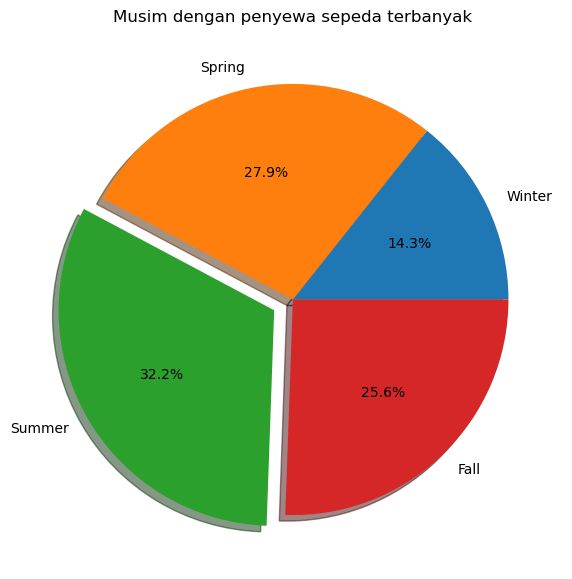

In [111]:
biggest_season = day.groupby('season')['cnt'].sum().reset_index()
biggest_season

fig , ax = plt.subplots(ncols=1,nrows=1,figsize=(10,7))
ax.pie(biggest_season['cnt'],autopct='%1.1f%%',labels=['Winter','Spring','Summer','Fall'],shadow=True,explode=(0,0,0.1,0))
ax.set_title('Musim dengan penyewa sepeda terbanyak')

<h4> <strong>Kesimpulan

Pertanyaan 1 : <br><br>
faktor yg paling mempengaruhi seseorang menyewa sepeda, yaitu faktor suhu .artinya faktor suhu berpengaruh positif sebesar 63% terhadap penyewaan sepeda. <br>
korelasi positif menunjukkan bahwa , ketika suhu nya meningkat , maka jumlah penyewaan sepeda nya meningkat secara linear .    ada juga korelasi positif antara variable tahun (yr) dgn penyewaan sepeda. yg artinya , semakin kesini , usaha nya semakin sukses <br>

pada pukul 7 hingga 8 , terdapat kenaikan penyewa yg cukup tinggi. <br>

lalu terdapat hubungan negatif antara kelembapan dengan penyewaan sepeda . artinya semakin lembap , suatu udara , maka semakin sedikit jumlah orang yg menyewa sepeda <br>

berdasarkan model yg telah dibuat ,  85% banyaknya penyewa sepeda dipengaruhi oleh faktor seperti : season	yr	mnth	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed


Pertanyaan 2: <br>

Kebanyakan seseorang menyewa sepeda pada Quartal ke-2 hingga Quartal ke-3 . mungkin bertepatan dengan musim panas , sehingga orang lebih cenderung beraktivitas di luar ruangan, termasuk bersepeda. lalu puncaknya terjadi dibulan agustus dengan total penyewa sebanyak 351194 <br>

bulan dengan jumlah penyewa sepeda paling sedikit adalah bulan januari , sementara jumlah penyewa terbanyak bulan agustus

Pertanyaan 3: <br> <br>

Setiap tahun , semakin bertambah jumlah penyewa sepedanya . dan bisnis nya mengalami pertumbuhan

Pertanyaan 4: <br>

Ya , terdapat perbedaan signifikan antara jumlah penyewa terdaftar dengan jumlah penyewa tidak terdaftar

<span > Strategi Meningkatkan Penyewa Terdaftar
Setelah melakukan analisis, yaitu:<ul><li>Tawarkan diskon pendaftaran selama bulan tertentu.<br><li>Jika hasil menunjukkan bahwa lebih banyak orang menggunakan sepeda di musim panas, buat promosi khusus di musim tersebut.<br><li>
mengimplementasikan program yang memberikan poin untuk setiap sewa yang dapat ditukarkan dengan keuntungan. </span> 

Pertanyaan 5: <br>
Ya , hari libur/akhir pekan memiliki dampak yg signifikan terhadap jumlah penyewaan sepeda dibanding hari kerja. <br>
rata-rata jumlah penyewa sepeda pada hari libur/akhir pekan itu lebih sedikit dibanding hari kerja

Pertanyaan 6: <br>
Ya , musim sangat berpengaruh terhadap banyaknya penyewa sepeda. setiap musim memiliki perbedaan terhadap banyaknya penyewa sepeda , kecuali musim 2 dengan musim 4. 

dan musim dengan penyewa sepeda terbesar yaitu musim panas , dgn persentase sebesar 32%